<a href="https://colab.research.google.com/github/enesergen/Fashion_Models/blob/main/fashion_model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

In [3]:
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/output.zip")
zip_ref.extractall()
zip_ref.close()

ls: cannot access 'drive/MyDrive/output/': No such file or directory
['Caps' 'Dresses' 'Handbags' 'Jackets' 'Pants' 'Shirts' 'Shoes' 'Shorts'
 'Skirts' 'Sunglasses' 'Sweaters' 'Sweatshirts' 'Tshirts']
Found 19654 images belonging to 13 classes.
Found 2450 images belonging to 13 classes.
Found 2470 images belonging to 13 classes.
Epoch 1/5
615/615 [==============================] - 1102s 2s/step - loss: 1.5198 - accuracy: 0.5014 - val_loss: 0.7225 - val_accuracy: 0.7984
Epoch 2/5
615/615 [==============================] - 1097s 2s/step - loss: 0.8099 - accuracy: 0.7481 - val_loss: 0.4892 - val_accuracy: 0.8535
Epoch 3/5
615/615 [==============================] - 1080s 2s/step - loss: 0.6197 - accuracy: 0.8154 - val_loss: 0.4042 - val_accuracy: 0.8722
Epoch 4/5
615/615 [==============================] - 1127s 2s/step - loss: 0.5511 - accuracy: 0.8316 - val_loss: 0.3355 - val_accuracy: 0.8976
Epoch 5/5
78/78 [==============================] - 94s 1s/step - loss: 0.3367 - accuracy: 0.8842


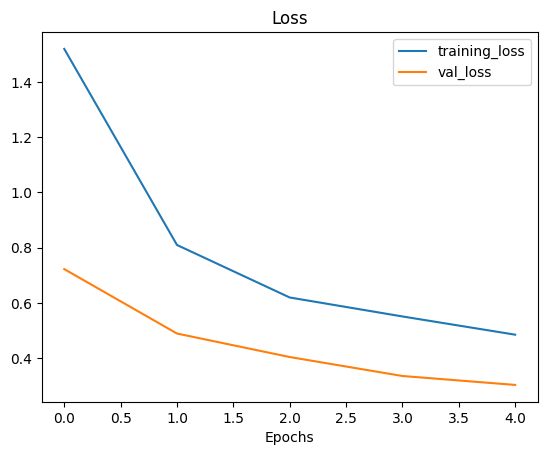

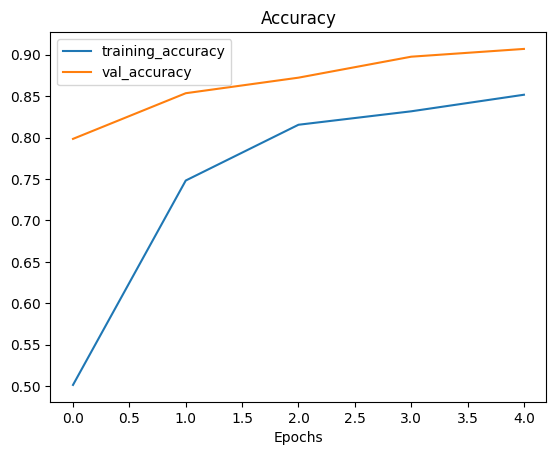

In [9]:
!ls drive/MyDrive/output/
import os 
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers.legacy import Adam

for dirpath,dirnames,filenames in os.walk("drive/MyDrive/output"):
  print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}'.")

 #must be controlled whether the path is correct or not
train_dir="/content/output/train/"
test_dir="/content/output/test/"
val_dir="/content/output/val/"



data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.3,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")
val_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
val_data=val_datagen.flow_from_directory(val_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

tf.random.set_seed(42)

model_4=Sequential([
      Conv2D(32,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(13,activation="softmax")

])

model_4.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4=model_4.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=val_data,
                      validation_steps=len(val_data))

model_4.evaluate(test_data)

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_4)

model_4.save("Model_4")

model_4.save("Model_4_h5.h5")





In [10]:
!zip -r /content/Model_4 /content/Model_4
from google.colab import files
files.download("/content/Model_4.zip")

  adding: content/Model_4/ (stored 0%)
  adding: content/Model_4/saved_model.pb (deflated 90%)
  adding: content/Model_4/fingerprint.pb (stored 0%)
  adding: content/Model_4/assets/ (stored 0%)
  adding: content/Model_4/keras_metadata.pb (deflated 95%)
  adding: content/Model_4/variables/ (stored 0%)
  adding: content/Model_4/variables/variables.index (deflated 75%)
  adding: content/Model_4/variables/variables.data-00000-of-00001 (deflated 10%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>